### Manifold: t-SNE

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(font_scale=1.8)

In [3]:
data = pd.read_csv('score.csv')
data = data.set_index('Protein')
def rearrang(olddf):
    col = ['CVA','IHD','CM','ARR','VD','CHD']
    newdf = pd.DataFrame()
    for t in col:
        newdf[t]= olddf[t]
    return newdf
ndf = rearrang(data)
ndf.head()

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072
aromatic-l-amino-acid_decarboxylase,0.055959,0.010260,0.011459,0.070661,0.000000,0.007809
nadph_oxidase_activator_1,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000


-------------

In [4]:
tdata =ndf.copy(deep =True)

In [5]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'navy'
        elif mx == col[1]:
            grp =  'green'
        elif mx == col[2]:
            grp = 'firebrick'
        elif mx == col[3]:
            grp = 'mediumslateblue'
        elif mx == col[4]:
            grp = 'darkgoldenrod'
        elif mx == col[5]:
            grp = 'deepskyblue'
    clrs.append(grp)

In [6]:
from sklearn.manifold import TSNE

### 2D

In [57]:
data = np.array(tdata)
Xtsne2d = TSNE(n_components=2).fit_transform(data)
Xtsne2d.shape

(2869, 2)

In [58]:
x_min, x_max = np.min(Xtsne2d, axis=0), np.max(Xtsne2d, axis=0)
Xtsne2d = (Xtsne2d - x_min) / (x_max - x_min)

In [59]:
Xtsne2d[0:5]

array([[0.35133746, 0.69377434],
       [0.3200494 , 0.73890185],
       [0.487059  , 0.9118617 ],
       [0.8061351 , 0.46582842],
       [0.8218911 , 0.510056  ]], dtype=float32)

In [60]:
PN = Xtsne2d.shape[0]

In [61]:
X2d =[]
Y2d = []
for i in range(PN):
    X2d.append(Xtsne2d[i][0])
    Y2d.append(Xtsne2d[i][1])

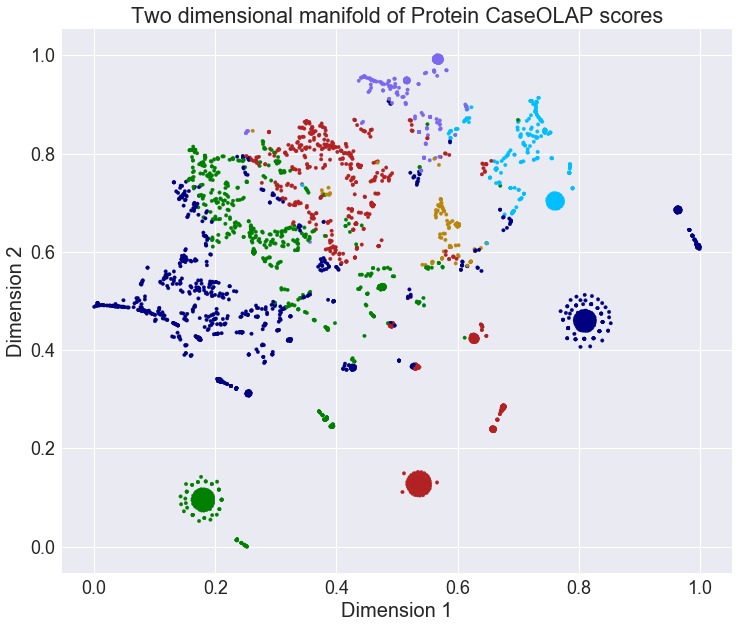

In [62]:
plt.figure(figsize = [12,10])
plt.grid(True)
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')
plt.title('Two dimensional manifold of Protein CaseOLAP scores')
plt.xlabel("Dimension 1", fontsize=20)
plt.ylabel("Dimension 2", fontsize=20)
plt.scatter(X2d,Y2d,color = clrs, marker ='.')
plt.savefig('tsne2d/tSNE2d.pdf')

In [68]:
tsnedf = ndf.copy(deep =True)
tsnedf['X'] = X2d
tsnedf['Y'] = Y2d
tsnedf['color'] = clrs
tsnedf.head()

,CVA,IHD,CM,ARR,VD,CHD,X,Y,color
Protein,,,,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314,0.351337,0.693774,firebrick
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072,0.320049,0.738902,firebrick
aromatic-l-amino-acid_decarboxylase,0.055959,0.010260,0.011459,0.070661,0.000000,0.007809,0.487059,0.911862,mediumslateblue
nadph_oxidase_activator_1,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000,0.806135,0.465828,navy
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000,0.821891,0.510056,navy


### Add Uniprot

In [69]:
udata = pd.read_csv('myuniprot.csv')
udata = udata.set_index('Protein')
udf = udata.copy(deep =True)
udf.head()

,uniprot
Protein,
small_ubiquitin-related_modifier_1,P63165
metalloproteinase_inhibitor_4,Q99727
aromatic-l-amino-acid_decarboxylase,P20711
nadph_oxidase_activator_1,Q86UR1
tumor_necrosis_factor_ligand_superfamily_member_14,O43557


In [70]:
idx_cvd = list(tsnedf.index)
idx_uprt =  list(udf.index)

uprot = []
for item in idx_cvd:
    if item in idx_uprt:
        uprot.append(list(udf.loc[item,:])[0])
    else:
        print(item,'Match not Found')
        uprot.append('NAN')   

h(+)/cl(-)_exchange_transporter_3 Match not Found
superoxide_dismutase Match not Found
dna-(apurinic_or_apyrimidinic_site)_lyase Match not Found
cytosine-5)-methyltransferase_1 Match not Found
methylmalonate-semialdehyde_dehydrogenase Match not Found
calcitonin Match not Found
dihydropyrimidine_dehydrogenase Match not Found
alpha-(1,3)-fucosyltransferase_6 Match not Found
cad_protein Match not Found
collagen_alpha-1(viii)_chain Match not Found
carbamoyl-phosphate_synthase Match not Found
proenkephalin-a Match not Found
d(2)_dopamine_receptor Match not Found
n(g),n(g)-dimethylarginine_dimethylaminohydrolase_1 Match not Found
d(1a)_dopamine_receptor Match not Found
nad(p)_transhydrogenase,_mitochondrial Match not Found
extracellular_superoxide_dismutase Match not Found
agrin Match not Found
poly(rc)-binding_protein_1 Match not Found
glucagon Match not Found
isocitrate_dehydrogenase Match not Found
glycogen Match not Found
cytosine(34)-c(5))-methyltransferase Match not Found
amine_oxidase

In [71]:
tsnedf['uprot'] = uprot
tsnedf.head(10)

,CVA,IHD,CM,ARR,VD,CHD,X,Y,color,uprot
Protein,,,,,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314,0.351337,0.693774,firebrick,P63165
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072,0.320049,0.738902,firebrick,Q99727
aromatic-l-amino-acid_decarboxylase,0.055959,0.010260,0.011459,0.070661,0.000000,0.007809,0.487059,0.911862,mediumslateblue,P20711
nadph_oxidase_activator_1,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000,0.806135,0.465828,navy,Q86UR1
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000,0.821891,0.510056,navy,O43557
receptor-type_tyrosine-protein_phosphatase_mu,0.000000,0.022208,0.024102,0.000000,0.000000,0.000000,0.625661,0.416806,firebrick,P28827
apolipoprotein_a-i,0.080378,0.416055,0.020318,0.005165,0.010568,0.007541,0.157713,0.807021,green,P02647
cyclin-t1,0.000000,0.000000,0.072453,0.000000,0.000000,0.000000,0.435476,0.777980,firebrick,O60563
hairy/enhancer-of-split_related_with_yrpw_motif_protein_1,0.061648,0.024028,0.023326,0.000000,0.000000,0.000000,0.281589,0.449987,navy,Q9Y5J3


In [72]:
tsnedf.to_csv('tsne2d/tsneall.csv')

### CVA

In [115]:
cva = tsnedf[tsnedf['color']=='navy']
cva.to_csv('tsne2d/cva_all.csv')

In [116]:
cva_ball = cva[cva['X']>0.75]
cva_ball = cva_ball[cva_ball['Y']<0.60]
cva_ball.to_csv('tsne2d/cva_ball.csv')

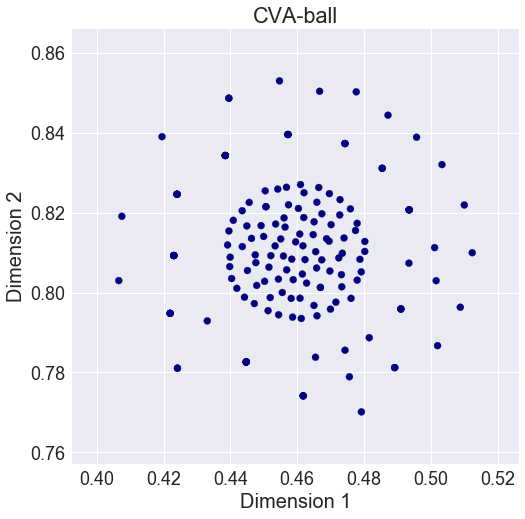

In [117]:
plt.figure(figsize = [8,8])
plt.scatter(cva_ball['Y'],cva_ball['X'],color=cva_ball['color'])
plt.title('CVA-ball')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.savefig('tsne2d/cva-ball.pdf')

In [118]:
cva_ball.head()

,CVA,IHD,CM,ARR,VD,CHD,X,Y,color,uprot
Protein,,,,,,,,,,
nadph_oxidase_activator_1,0.035732,0.0,0.0,0.0,0.0,0.0,0.806135,0.465828,navy,Q86UR1
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.0,0.0,0.0,0.0,0.0,0.821891,0.510056,navy,O43557
tyrosine_aminotransferase,0.035732,0.0,0.0,0.0,0.0,0.0,0.824576,0.424041,navy,P17735
neuroendocrine_convertase_2,0.035732,0.0,0.0,0.0,0.0,0.0,0.809957,0.512434,navy,P16519
double-stranded_rna-specific_editase_1,0.035732,0.0,0.0,0.0,0.0,0.0,0.781084,0.424164,navy,P78563


### IHD

In [119]:
ihd = tsnedf[tsnedf['color']=='green']
ihd.to_csv('tsne2d/ihd_all.csv')

In [120]:
ihd_ball = ihd[ihd['Y']<0.2]
ihd_ball = ihd_ball[ihd_ball['X']< 0.22]
ihd_ball.to_csv('tsne2d/ihd_ball.csv')

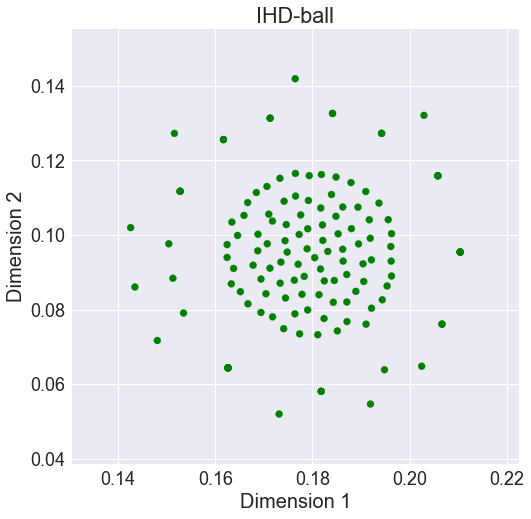

In [121]:
plt.figure(figsize = [8,8])
plt.scatter(ihd_ball['X'],ihd_ball['Y'],color=ihd_ball['color'])
plt.title('IHD-ball')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.savefig('tsne2d/ihd-ball.pdf')

### CM

In [122]:
cm = tsnedf[tsnedf['color']== 'firebrick']
cm.to_csv('tsne2d/cm_all.csv')

In [123]:
cm_ball = cm[cm['Y']< 0.2]
cm_ball.to_csv('tsne2d/cm_ball.csv')

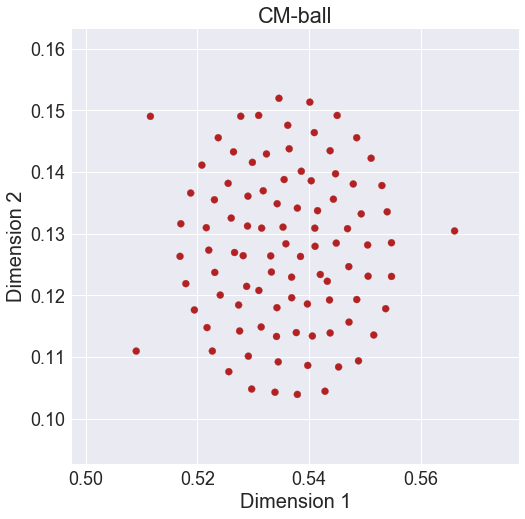

In [124]:
plt.figure(figsize = [8,8])
plt.scatter(cm_ball['X'],cm_ball['Y'],color=cm_ball['color'])
plt.title('CM-ball')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.savefig('tsne2d/cm-ball.pdf')

### ARR

In [125]:
arr = tsnedf[tsnedf['color']=='mediumslateblue' ]
arr.to_csv('tsne2d/arr_all.csv')

In [126]:
arr_ball = arr[arr['Y']> 0.97]
arr_ball = arr_ball[arr_ball['X']< 0.6]
arr_ball.to_csv('tsne2d/arr_ball.csv')

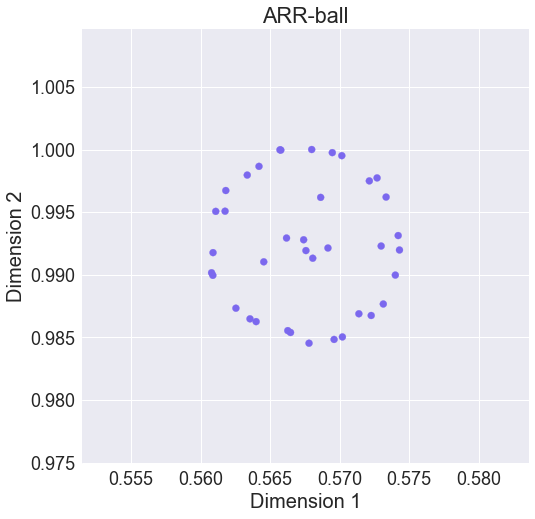

In [127]:
plt.figure(figsize = [8,8])
plt.scatter(arr_ball['X'],arr_ball['Y'],color=arr_ball['color'])
plt.title('ARR-ball')
plt.xlabel('Dimension 1',fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.savefig('tsne2d/arr-ball.pdf')

### CHD

In [128]:
chd = tsnedf[tsnedf['color']== 'deepskyblue']
chd.to_csv('tsne2d/chd_all.csv')

In [129]:
chd_ball = chd[chd['Y']< 0.725]
chd_ball = chd_ball[chd_ball['X']< 0.777]
chd_ball = chd_ball[chd_ball['X']> 0.725]
cm_ball.to_csv('tsne2d/chd_ball.csv')

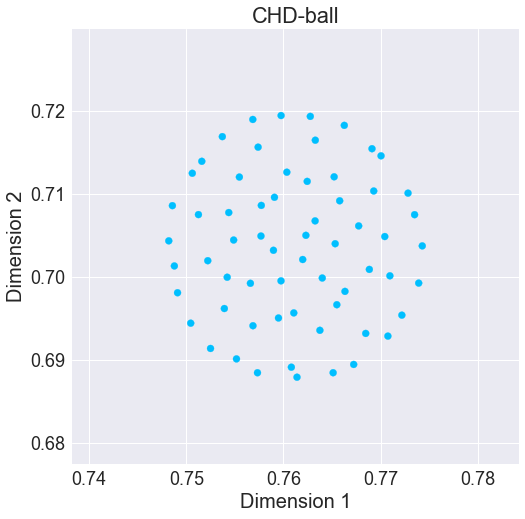

In [130]:
plt.figure(figsize = [8,8])
plt.scatter(chd_ball['X'],chd_ball['Y'],color=chd_ball['color'])
plt.title('CHD-ball')
plt.xlabel('Dimension 1',fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.savefig('tsne2d/chd-ball.pdf')

### VD

In [131]:
vd = tsnedf[tsnedf['color']=='darkgoldenrod']
vd.to_csv('tsne2d/vd_all.csv')

------------

### Sub Plots

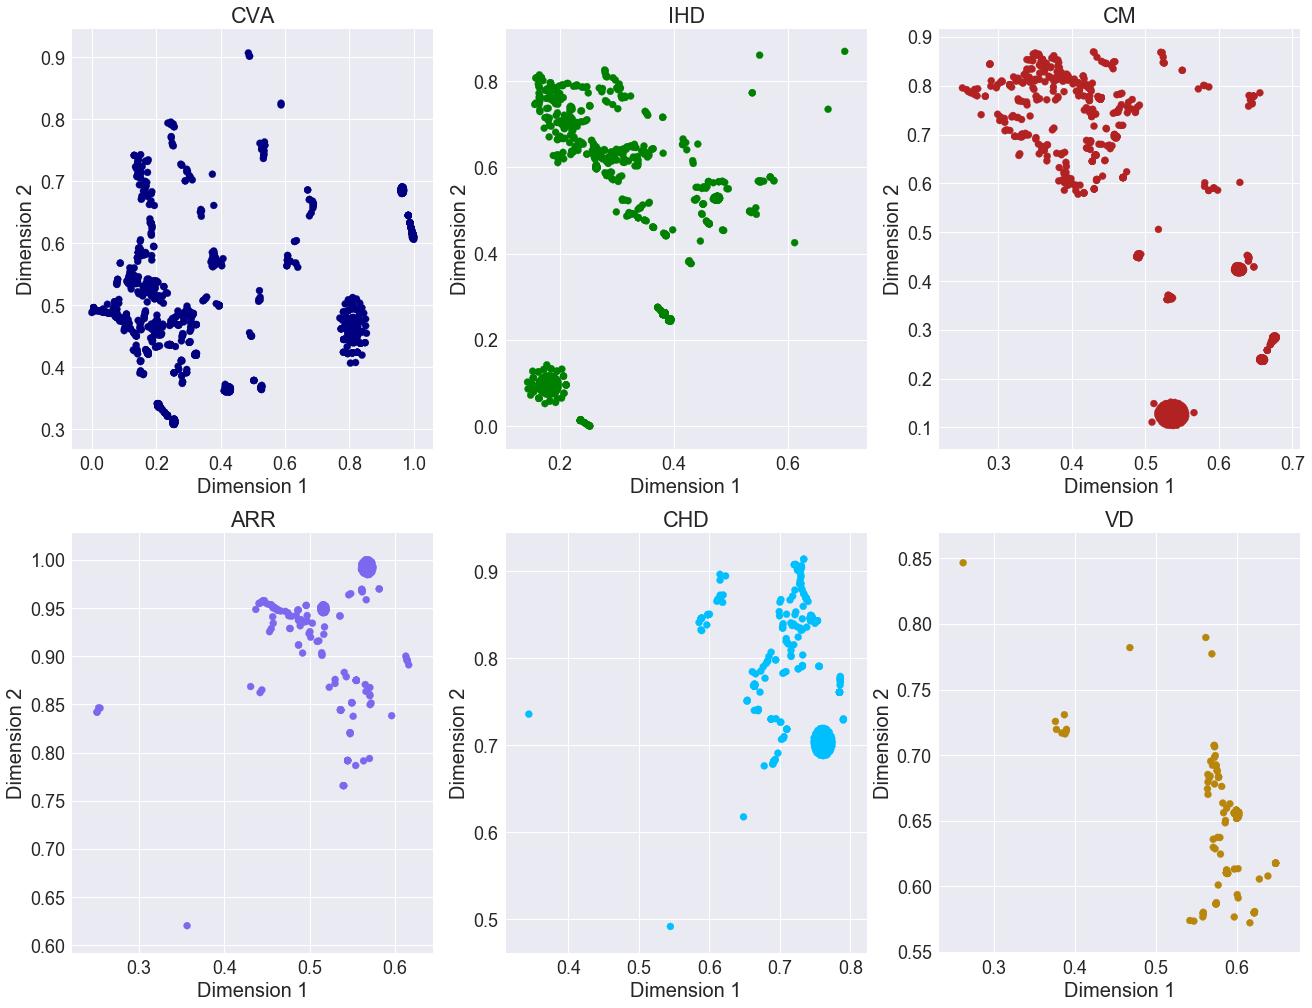

In [132]:
plt.figure(figsize = [22,17])
plt.subplot(2,3,1)
plt.scatter(cva['X'],cva['Y'],color=cva['color'])
plt.title('CVA')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.subplot(2,3,2)
plt.scatter(ihd['X'],ihd['Y'],color=ihd['color'])
plt.title('IHD')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.subplot(2,3,3)
plt.scatter(cm['X'],cm['Y'],color=cm['color'])
plt.title('CM')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.subplot(2,3,4)
plt.scatter(arr['X'],arr['Y'],color=arr['color'])
plt.title('ARR')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.subplot(2,3,5)
plt.scatter(chd['X'],chd['Y'],color=chd['color'])
plt.title('CHD')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.subplot(2,3,6)
plt.scatter(vd['X'],vd['Y'],color=vd['color'])
plt.title('VD')
plt.xlabel('Dimension 1', fontsize =20)
plt.ylabel('Dimension 2',fontsize =20)
plt.savefig('tsne2d/tsne-subplot.pdf')
plt.show()